## Data Exploration

In [18]:
import pandas as pd
import numpy as np

In [19]:
df = pd.read_csv("telco_train.csv", index_col=0)

In [21]:
df.customer_id.nunique() == df.shape[0]

True

Only one observation per customer, so no way to track change in customer variables over time.

In [22]:
from sklearn.preprocessing import StandardScaler

y = df.churn.values
df_x = df.drop(labels = ["customer_id", "churn"], axis=1)
X = df_x.values

X = StandardScaler().fit_transform(X)

In [23]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)

principalComponents = pca.fit_transform(X)

principalDf = pd.DataFrame(data = principalComponents, 
                          columns = ["PC1", "PC2"])

In [24]:
finalDf = pd.concat([principalDf, df.churn], axis=1)

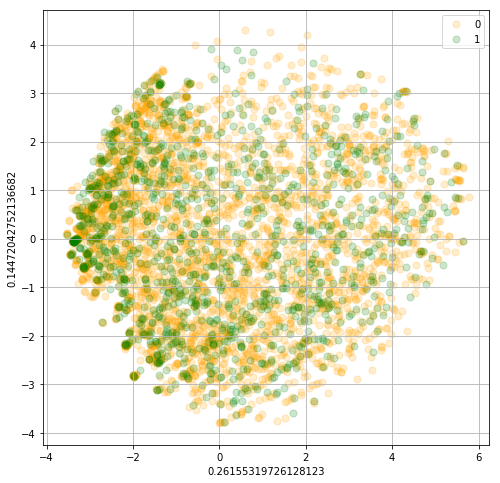

In [26]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(1,1,1)

var = pca.explained_variance_ratio_
ax.set_xlabel(var[0])
ax.set_ylabel(var[1])

target = [0, 1]
colors = ('orange', 'green')
for target, color in zip(target, colors):
    indicesToKeep = finalDf.churn == target
    ax.scatter(finalDf.loc[indicesToKeep, "PC1"], 
               finalDf.loc[indicesToKeep, "PC2"], 
               c = color, 
               s = 50,
               alpha = 0.2)

ax.legend(["0", "1"])
ax.grid()

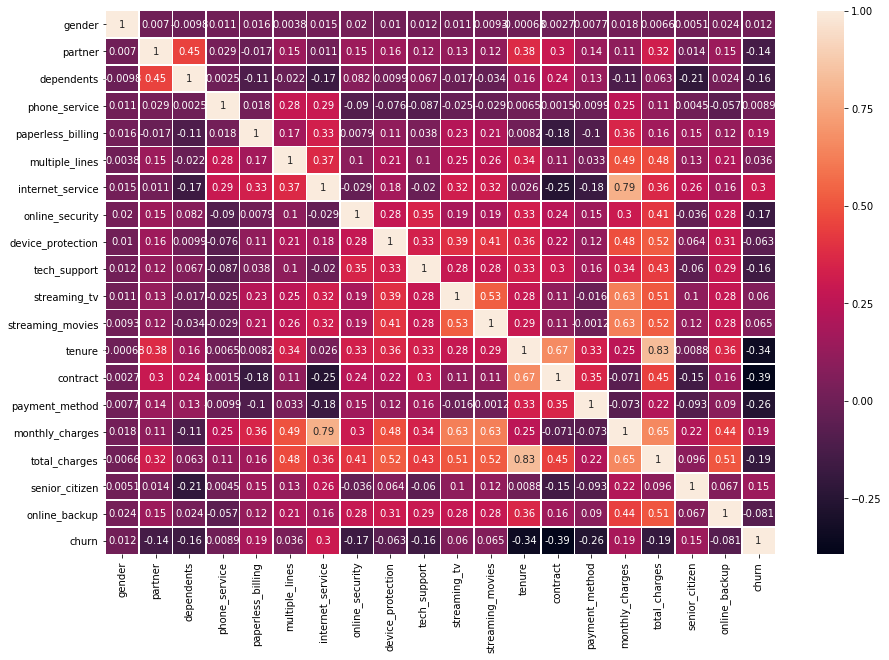

In [27]:
import seaborn as sns

corr = df.drop("customer_id", axis=1).corr()

fig, ax = plt.subplots(figsize=(15,10))
sns.heatmap(corr, annot=True, linewidths=.5, ax=ax)

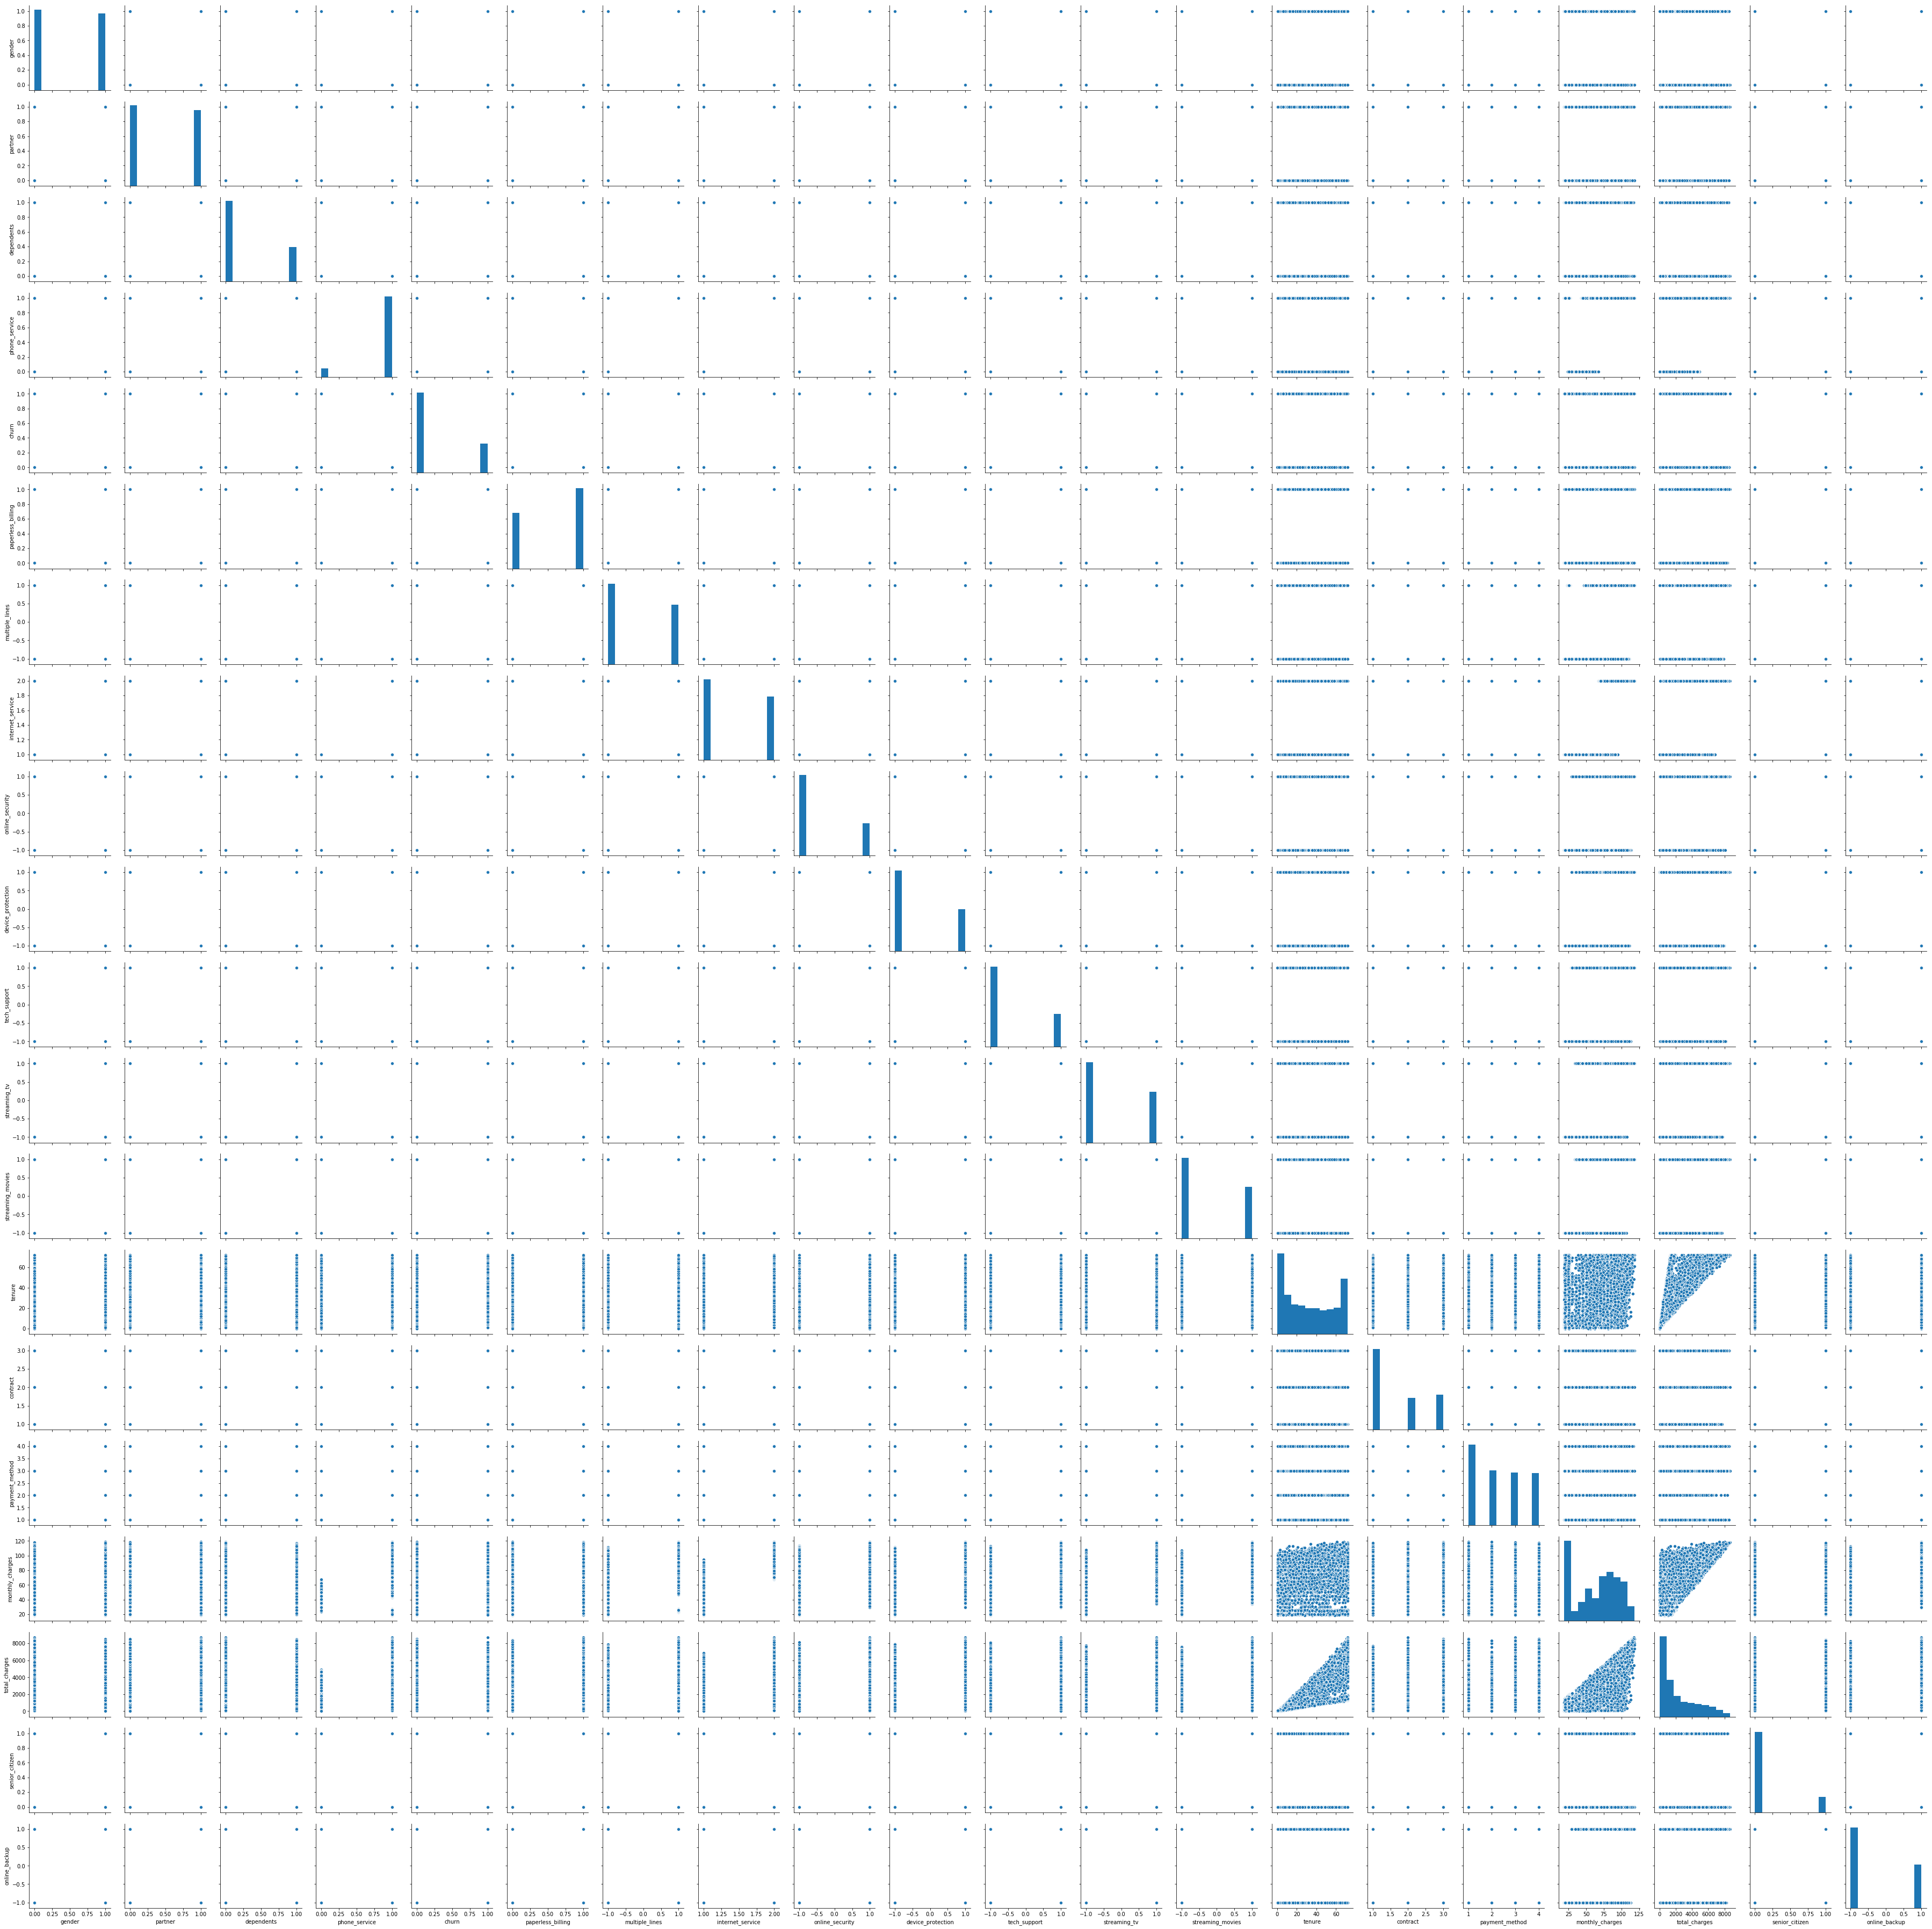

In [46]:
pairs = sns.pairplot(df.drop("customer_id", axis=1))